In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/volume1_exp.csv")
df = df.drop(["PropName","B"],axis=1)
df['BladeName'].value_counts()

apcsp 8.0x9.0      160
apce 8.0x8.0       160
apce 11.0x10.0     156
grcsp 9.0x6.0      155
kyosho 10.0x7.0    154
                  ... 
magf 7.0x4.0        76
grcp 11.0x4.0       76
gwssf 10.0x4.7      69
kavfk 9.0x4.0       69
ma 11.0x4.0         64
Name: BladeName, Length: 139, dtype: int64

In [ ]:
df.head()

,BladeName,Family,D,P,J,N,CT,CP,eta
0,ance 8.5x6.0,ance,8.5,6.0,0.165,4000.0,0.0993,0.0539,0.304
1,ance 8.5x6.0,ance,8.5,6.0,0.214,4000.0,0.0947,0.0543,0.374
2,ance 8.5x6.0,ance,8.5,6.0,0.255,4000.0,0.0916,0.0548,0.427
3,ance 8.5x6.0,ance,8.5,6.0,0.301,4000.0,0.0847,0.0540,0.473
4,ance 8.5x6.0,ance,8.5,6.0,0.340,4000.0,0.0796,0.0530,0.511


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), df.columns[2:-1].tolist()),
    (OneHotEncoder(handle_unknown="ignore",sparse=False), df.columns[0:2].tolist())
)

In [ ]:
X = df.drop("eta", axis=1)
y = df["eta"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ct.fit(X_train)


X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train

,BladeName,Family,D,P,J,N,CT,CP
9368,gwssf 10.0x4.7,gwssf,10.0,4.7,0.174,4006.0,0.1038,0.0505
6133,apcsp 8.0x8.0,apcsp,8.0,8.0,0.451,4019.0,0.0918,0.0873
1201,apce 11.0x7.0,apce,11.0,7.0,0.437,3003.0,0.0522,0.0362
13512,ma 11.0x8.0,ma,11.0,8.0,0.705,4998.0,0.0225,0.0278
13160,ma 11.0x10.0,ma,11.0,10.0,0.322,3982.0,0.1091,0.0690
...,...,...,...,...,...,...,...,...
11284,mae 9.0x6.0,mae,9.0,6.0,0.726,5011.0,0.0310,0.0459
11964,magf 8.0x4.0,magf,8.0,4.0,0.560,7012.0,0.0133,0.0178
5390,apcsp 7.0x6.0,apcsp,7.0,6.0,0.695,5024.0,0.0401,0.0487
860,apce 10.0x7.0,apce,10.0,7.0,0.540,4007.0,0.0479,0.0385


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=30)

In [ ]:
import tensorflow as tf
# Set random seed
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(128,activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(128,activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(64,activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(64,activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(32,activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(32,activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

history = model.fit(X_train_normal, y_train, epochs=600,validation_data=(X_test_normal,y_test),callbacks=[early_stop])

Epoch 1/600
412/412 [==============================] - 4s 6ms/step - loss: 0.1476 - mae: 0.1476 - val_loss: 0.0725 - val_mae: 0.0725
Epoch 2/600
412/412 [==============================] - 3s 6ms/step - loss: 0.0626 - mae: 0.0626 - val_loss: 0.0577 - val_mae: 0.0577
Epoch 3/600
412/412 [==============================] - 3s 7ms/step - loss: 0.0494 - mae: 0.0494 - val_loss: 0.0367 - val_mae: 0.0367
Epoch 4/600
412/412 [==============================] - 2s 4ms/step - loss: 0.0408 - mae: 0.0408 - val_loss: 0.0344 - val_mae: 0.0344
Epoch 5/600
412/412 [==============================] - 2s 4ms/step - loss: 0.0386 - mae: 0.0386 - val_loss: 0.0415 - val_mae: 0.0415
Epoch 6/600
412/412 [==============================] - 2s 4ms/step - loss: 0.0375 - mae: 0.0375 - val_loss: 0.0350 - val_mae: 0.0350
Epoch 7/600
412/412 [==============================] - 2s 5ms/step - loss: 0.0334 - mae: 0.0334 - val_loss: 0.0277 - val_mae: 0.0277
Epoch 8/600
412/412 [==============================] - 2s 4ms/step - 

In [ ]:
model_loss, model_mae = model.evaluate(X_test_normal, y_test)

103/103 [==============================] - 0s 3ms/step - loss: 0.0106 - mae: 0.0106


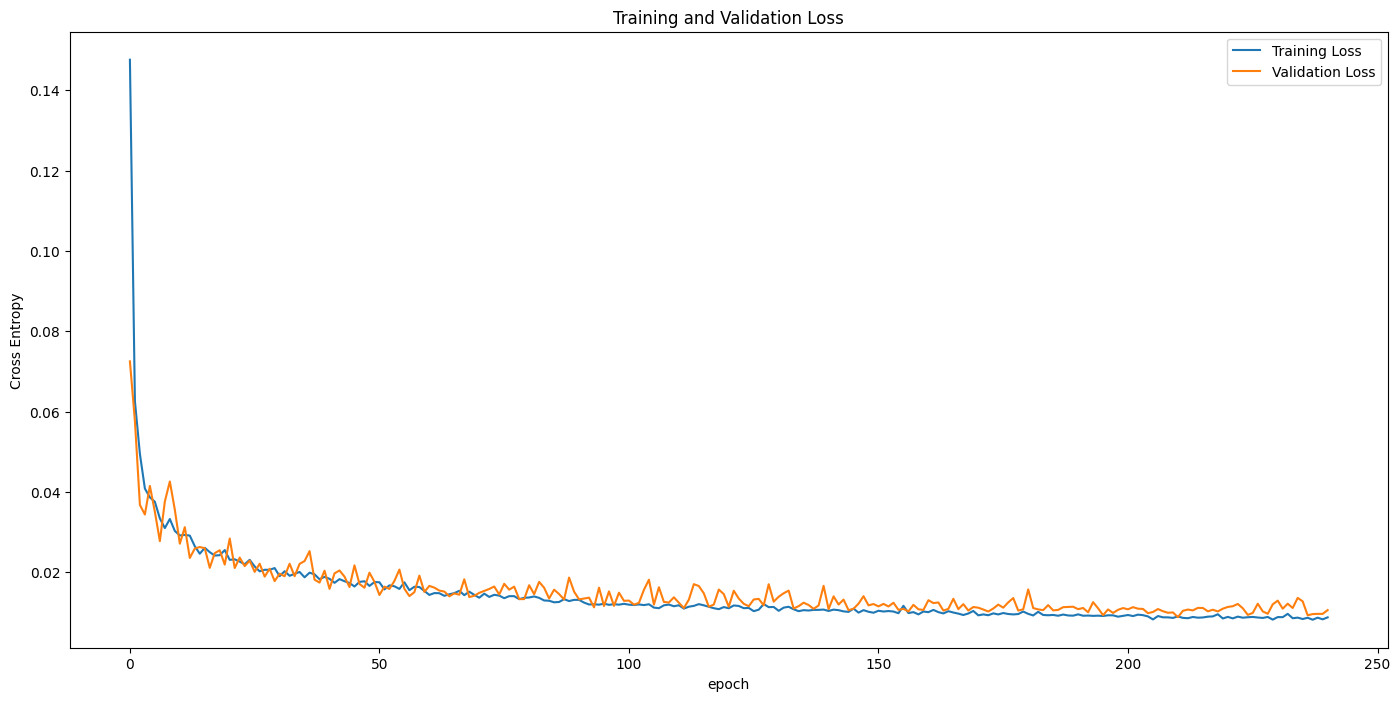

In [ ]:
plt.figure(figsize=(17,8))
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# save model
model.save('/content/drive/MyDrive/UIUC_Propeller2.keras')
print('Model Saved!')

Model Saved!
